UItleg

"Game theory is the study of mathematical models of strategic interaction among rational decision-makers" - Myerson, Roger B. (1991). Game Theory: Analysis of Conflict, Harvard University Press, p.

In essentie gaat het dus om de keuzes die een individue maakt te voorspellen of te beschrijven.

Het meest bekende voorbeeld is het prisonors dillema


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.randint(0,100, size=150)
print(x)

[79 57 53 43 30 75 48 85 16 58 23 16 39  7 84 51 78 46  1 78  9 39 89 20
 83 46 31 83 82 65 76 26 83 55 91 79 72 90 49 19 98 38 10 94 95 94 89 75
 37 26 74 33 51 28 58  9 95 97 59 41 83 14 19 21 77 74 32  9 50  7 30 75
 92 67 71 91 85 23 71 86 46 87  9 60 13 75 86 17 13 75 35 73 95  3 96 68
 41 79 26 37 15 40 99 38 11 98 22 41 83 89 85 71 92 14  2 22 58 47 26 26
 29 99 85  2 75 20 95  2 26 99  1 90  9 15 88 73  7 78 88 70 78  8 77 47
 10 59 25 69  2 66]


In [3]:
y = np.random.randint(low=-10,high=10, size=150)

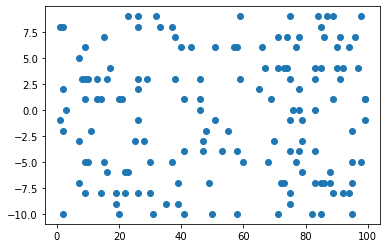

In [4]:
custommers = np.concatenate((x, y), axis=0)
custommers.shape = (150,2)
plt.scatter(x, y)

Hierboven zien wij een strand. De blauwen punten zijn de strand gangers en op dit strand zijn twee ijskomannen die moeten bepalen waar ze hun kar gaan zetten.

Stel langs y=0 loopt een pad. De ijskomannen mogen een x positie kiezen op dat pad. Als een strand ganger ijs wil kopen zal deze eerst naar het pad moeten lopen (y=0) en daarna loopt hij naar de de dichtsbijzijnde verkoper. Nadat de verkopers deze positie hebben gekozen kijken ze naar voor hoeveel mensen zij het dichtsbij zijn. De ijskomannen bepalen dan hoeveel klanten zij zullen hebben als ze een positie opschijven naar links, naar  rechts of als ze bijven staan. De actie die ze het meeste klanten opleverd nemen ze.

In de idealen situatie zouden de ijskomannen het strand door midden delen bijden dienen dan de helft van het strand en de strand gangers hoeven het minst ver te lopen. Dit wordt ookwel de social optimal solution genoemd. Maar zoals we zullen zien gaat dit in de werkelekheid anders

In [5]:
# De y waarden kan achergelaten worden omdat het toch over de afstand van het pat gaat
custommers = np.random.randint(0,100, size=500)

In [6]:
def checker(self , other, custommers):
    custommers_for_a = 0
    custommers_for_b = 0
    for custommer in custommers:
        dist_to_a = abs(self - custommer)
        dist_to_b = abs(other - custommer)
        if dist_to_a < dist_to_b:
            custommers_for_a += 1
        elif dist_to_a == dist_to_b and np.random.choice([False, True]):
            custommers_for_a += 1
        
    return custommers_for_a

In [7]:
def determin_position(self, other, custommers):
    staying = checker(self, other, custommers)
    going_left = checker(self -1, other, custommers)
    going_right = checker(self +1, other, custommers)
    return (going_left, staying, going_right)

In [8]:
def act(name, self, other, custommers, VERBOSE=False):
    new_pos = self
    left, stay, right = determin_position(self, other, custommers)
    scores = (f" Going left for {name} will give {left} custommers \n"
              f"Staying for {name} will give {stay} custommers \n"
              f"Going right for {name} will give {right} custommers \n\n")

    if left > stay and left > right:
        new_pos = self -1
        action = f"{name} will go left giving it the postion {new_pos}\n"
    elif stay > left and stay > right:
        action = f"{name} will stay giving it the postion {new_pos}\n"
    elif right > left and right > left:
        new_pos = self +1
        action = f"{name} will go right giving it the postion {new_pos}\n"
    elif stay == right or stay == left:
        action = f"{name} will stay giving it the postion {new_pos}\n"
    
    elif right > left:
        new_pos = self +1
        action = f"{name} will go right giving it the postion {new_pos}\n"
    else:
        new_pos = self -1
        action = f"{name} will go left giving it the postion {new_pos}\n"
        
    if VERBOSE:
        print(scores)
        print(action)
    
    return new_pos
    
              

In [9]:
a_postions = []
b_postions = []
x_a = 25
x_b = 75
for i in range(100):
    a_postions.append(x_a)
    b_postions.append(x_b)
    new_x_a = act("A", x_a, x_b, custommers, VERBOSE=True)
    new_x_b = act("B", x_b, x_a, custommers, VERBOSE=True)
    if new_x_a != x_b:
        x_a = new_x_a
    if new_x_b != x_a:
        x_b = new_x_b


 Going left for A will give 254 custommers 
Staying for A will give 257 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 26

 Going left for B will give 246 custommers 
Staying for B will give 244 custommers 
Going right for B will give 242 custommers 


B will go left giving it the postion 74

 Going left for A will give 254 custommers 
Staying for A will give 256 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 27

 Going left for B will give 246 custommers 
Staying for B will give 242 custommers 
Going right for B will give 242 custommers 


B will go left giving it the postion 73

 Going left for A will give 254 custommers 
Staying for A will give 254 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 28

 Going left for B will give 246 custommers 
Staying for B will give 244 custommers 
Going right for B will give 242 custommers 


B will go le

 Going left for A will give 255 custommers 
Staying for A will give 258 custommers 
Going right for A will give 245 custommers 


A will stay giving it the postion 50

 Going left for B will give 240 custommers 
Staying for B will give 242 custommers 
Going right for B will give 239 custommers 


B will stay giving it the postion 51

 Going left for A will give 254 custommers 
Staying for A will give 258 custommers 
Going right for A will give 257 custommers 


A will stay giving it the postion 50

 Going left for B will give 225 custommers 
Staying for B will give 242 custommers 
Going right for B will give 242 custommers 


B will go right giving it the postion 52

 Going left for A will give 258 custommers 
Staying for A will give 261 custommers 
Going right for A will give 263 custommers 


A will go right giving it the postion 51

 Going left for B will give 242 custommers 
Staying for B will give 239 custommers 
Going right for B will give 237 custommers 


B will go left giving 


B will go left giving it the postion 51

 Going left for A will give 261 custommers 
Staying for A will give 263 custommers 
Going right for A will give 236 custommers 


A will stay giving it the postion 51

 Going left for B will give 275 custommers 
Staying for B will give 237 custommers 
Going right for B will give 236 custommers 


B will go left giving it the postion 51

 Going left for A will give 260 custommers 
Staying for A will give 263 custommers 
Going right for A will give 246 custommers 


A will stay giving it the postion 51

 Going left for B will give 248 custommers 
Staying for B will give 237 custommers 
Going right for B will give 234 custommers 


B will go left giving it the postion 51

 Going left for A will give 262 custommers 
Staying for A will give 263 custommers 
Going right for A will give 244 custommers 


A will stay giving it the postion 51

 Going left for B will give 249 custommers 
Staying for B will give 237 custommers 
Going right for B will give 

(0.0, 100.0)

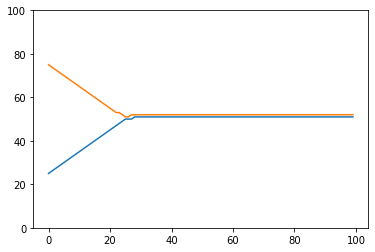

In [10]:
plt.plot(a_postions,label = "a")
plt.plot(b_postions,label = "b")
axes = plt.gca()
axes.set_ylim([0,100])

We zien hier dat de verkopers steeds veder naar elkaar toe schuiven totdat ze naast elkaar staan. Op dit punt heeft het geen zin meer om opteschuiven en is een nash equilibrium berijk. Stel we zouden aannemen dat de strand gasten maar een beperkt stuk willen lopen. Laten we zeggen 300 meter hoe beinvloed dit de simulatie? 



In [11]:
def checker(a , b, custommers, travel_limit=30):
#     a = np.array(a)
#     b = np.array(b)
    custommers_for_a = 0
    custommers_for_b = 0
    for custommer in custommers:
        dist_to_a = abs(a - custommer)
        dist_to_b = abs(b - custommer)
        if dist_to_a < dist_to_b and dist_to_a < travel_limit:
            custommers_for_a += 1
        elif (dist_to_a == dist_to_b )and (np.random.choice([False, True])) and (dist_to_a < travel_limit):
            custommers_for_a += 1

    # print(f"ca :{custommers_for_a}, cb: {custommers_for_b}")            
    return custommers_for_a

In [12]:
a_postions = []
b_postions = []
x_a = 25
x_b = 75
for i in range(100):
    a_postions.append(x_a)
    b_postions.append(x_b)
    new_x_a = act("A", x_a, x_b, custommers, VERBOSE=True)
    new_x_b = act("B", x_b, x_a, custommers, VERBOSE=True)
    if new_x_a != x_b:
        x_a = new_x_a
    if new_x_b != x_a:
        x_b = new_x_b

 Going left for A will give 254 custommers 
Staying for A will give 257 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 26

 Going left for B will give 246 custommers 
Staying for B will give 244 custommers 
Going right for B will give 242 custommers 


B will go left giving it the postion 74

 Going left for A will give 254 custommers 
Staying for A will give 256 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 27

 Going left for B will give 246 custommers 
Staying for B will give 245 custommers 
Going right for B will give 242 custommers 


B will go left giving it the postion 73

 Going left for A will give 254 custommers 
Staying for A will give 257 custommers 
Going right for A will give 258 custommers 


A will go right giving it the postion 28

 Going left for B will give 246 custommers 
Staying for B will give 243 custommers 
Going right for B will give 242 custommers 


B will go le


B will stay giving it the postion 70

 Going left for A will give 251 custommers 
Staying for A will give 254 custommers 
Going right for A will give 254 custommers 


A will go right giving it the postion 30

 Going left for B will give 241 custommers 
Staying for B will give 246 custommers 
Going right for B will give 243 custommers 


B will stay giving it the postion 70

 Going left for A will give 254 custommers 
Staying for A will give 252 custommers 
Going right for A will give 249 custommers 


A will go left giving it the postion 29

 Going left for B will give 238 custommers 
Staying for B will give 244 custommers 
Going right for B will give 242 custommers 


B will stay giving it the postion 70

 Going left for A will give 251 custommers 
Staying for A will give 254 custommers 
Going right for A will give 252 custommers 


A will stay giving it the postion 29

 Going left for B will give 240 custommers 
Staying for B will give 246 custommers 
Going right for B will give 24

(0.0, 100.0)

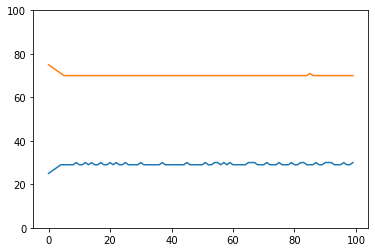

In [13]:
plt.plot(a_postions,label = "a")
plt.plot(b_postions,label = "b")
axes = plt.gca()
axes.set_ylim([0,100])

Wat we nu zien is dat bij een evenredige verdeling het nash equilibrium snel word berijkt. Als agent a naar links verschuift zal hij links een klant winnen maar rechts ook een klant verliezen omdat die geen ijs meer wil halen. Het wordt intressant wanneer de strand ganners niet evenredig zijn verdeeld over het strand.  

In [14]:
extra_x = np.random.randint(25,75, size=200)
extra_xx = np.random.randint(40,60, size=200)
extra_y = np.random.randint(low=-10,high=10, size=400)
custommers = np.concatenate((custommers, extra_x, extra_xx), axis=0)


(0.0, 100.0)

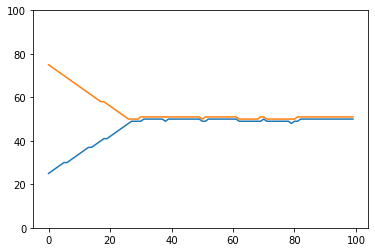

In [15]:
a_postions = []
b_postions = []
x_a = 25
x_b = 75
for i in range(100):
    a_postions.append(x_a)
    b_postions.append(x_b)
    new_x_a = act("A", x_a, x_b, custommers)
    new_x_b = act("B", x_b, x_a, custommers)
    if new_x_a != x_b:
        x_a = new_x_a
    if new_x_b != x_a:
        x_b = new_x_b

plt.plot(a_postions,label = "a")
plt.plot(b_postions,label = "b")
axes = plt.gca()
axes.set_ylim([0,100])

Hoe mee klanten zich in het midden bevinden hoe dichter de agents op elkaar zitten. We zien nu dat er eigelijk maar twee variable zijn die relevant zijn voor het berijken van het nash equilibrium. Hoever zijn de strand gasten bereid om te lopen en hoe hoog is de concentratie van gasten in het midden. 

Het intressante is dus dat het punt waar het nash equilibrium ligt niet afhankelijk is van acties of eigenschappen van de agents zelf maar dat het vrijwel compleet afhangt van de omgevings variablen (in deze situatie dan).

Mochten de twee ijskomannen niet tevreden zijn met deze situatie zullen ze onderling afspraken moeten maken over wie waar gaat staan. Als er afsrpaken worden gemaakt en de kosten van het breken van deze afspraken groter zijn dan de winst dan zal er een nieuw nash equilibrium worden gevonden dat potentieel ligt op de social optimal solution